In [10]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# Load the pre-processed data

In [2]:
df = pd.read_csv("loan_without_outliers.csv")

In [3]:
#remove the ids
df = df.drop(df.columns[0], axis=1)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Preparing the data with over-sampling techniques to balanced the classes

Based on primary studies (decision tree and random forest notebooks), I saw that balancing classes with Naive random over-sampling (RandomOverSampler) technique perfomed better results. Thus, I will use this technique to perform the other classifiers performance.

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [19]:
# Train test split
X = df.drop(['not.fully.paid'], axis = 1)
y = df['not.fully.paid']

In [20]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_sample(X, y)

# Function to print all the statistical models reports

In [21]:
def results(y_test,y_pred):
    results = confusion_matrix(y_test, y_pred)
    print ('Confusion Matrix :')
    print(results)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print ('Report : ')
    print (classification_report(y_test, y_pred))

# Building the Support Vector Machines (SVM) model

In [32]:
def compute_svm(X,y):

    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    results(y_test, y_pred)

In [33]:
compute_svm(X_ros, y_ros)

Confusion Matrix :
[[1465  605]
 [ 746 1410]]
Accuracy: 68.03%
Report : 
              precision    recall  f1-score   support

           0       0.66      0.71      0.68      2070
           1       0.70      0.65      0.68      2156

    accuracy                           0.68      4226
   macro avg       0.68      0.68      0.68      4226
weighted avg       0.68      0.68      0.68      4226



# Building the K-Nearest Neighbor (KNN) model

In [24]:
def compute_knn(X,y):

    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)


    neigh = KNeighborsClassifier()
    neigh.fit(X, y)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)

    results(y_test, y_pred)

In [25]:
compute_knn(X_ros,y_ros)

Confusion Matrix :
[[1302  768]
 [ 277 1879]]
Accuracy: 75.27%
Report : 
              precision    recall  f1-score   support

           0       0.82      0.63      0.71      2070
           1       0.71      0.87      0.78      2156

    accuracy                           0.75      4226
   macro avg       0.77      0.75      0.75      4226
weighted avg       0.77      0.75      0.75      4226



# Building the Artificial Neural Network (ANN) model¶

In [26]:
def compute_neural_network(X,y):

    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    nn = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
    nn.fit(X, y)
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)

    results(y_test, y_pred)

In [27]:
compute_neural_network(X_ros,y_ros)

/home/thais/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix :
[[1399  671]
 [ 495 1661]]
Accuracy: 72.41%
Report : 
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      2070
           1       0.71      0.77      0.74      2156

    accuracy                           0.72      4226
   macro avg       0.73      0.72      0.72      4226
weighted avg       0.73      0.72      0.72      4226



/home/thais/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Building the Gradient Boosted Decision Trees (Xgboost) model

In [28]:
def compute_xgboost(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    xgboost = XGBClassifier()
    xgboost.fit(X_train, y_train)
    y_pred = xgboost.predict(X_test)
    xgboost_probs = xgboost.predict_proba(X_test)

    results(y_test,y_pred)

In [29]:
compute_xgboost(X_ros,y_ros)

Confusion Matrix :
[[1780  290]
 [ 149 2007]]
Accuracy: 89.61%
Report : 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2070
           1       0.87      0.93      0.90      2156

    accuracy                           0.90      4226
   macro avg       0.90      0.90      0.90      4226
weighted avg       0.90      0.90      0.90      4226



# Defining the best parameters to the classifier through Grid Search method

As we could see the best performance with balanced data was with Gradient Boosted Decision Trees (Xgboost) method, therefore, I will find it the parameters through Grid Search.

In [34]:
# Get train an test datasets
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 0)

In [41]:
xgbclassifier = XGBClassifier()

# defining parameter range 
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 0],
        'max_depth': [5, 6, 7]
        }
  
grid = GridSearchCV(xgbclassifier, param_grid, cv = 5) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [42]:
# Best parameter after hyper parameter tuning 
print(grid.best_params_) 
  
# Moel Parameters 
print(grid.best_estimator_)

{'gamma': 0, 'max_depth': 7, 'min_child_weight': 1}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [43]:
# Prediction using best parameters
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print("Confusion Matrix : \n ",confusion_matrix(y_test, grid_predictions))
print("\n Accuracy Score : \n ",accuracy_score(y_test,grid_predictions))
print("\n Classification Report : \n",classification_report(y_test, grid_predictions))

Confusion Matrix : 
  [[1818  252]
 [  68 2088]]

 Accuracy Score : 
  0.9242782773308093

 Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      2070
           1       0.89      0.97      0.93      2156

    accuracy                           0.92      4226
   macro avg       0.93      0.92      0.92      4226
weighted avg       0.93      0.92      0.92      4226



# Roc curve and Auc in the grid search model

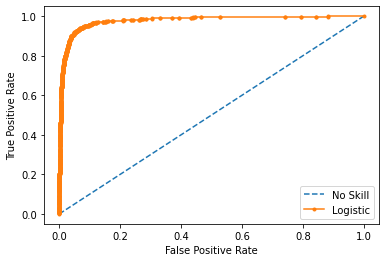

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

xgboost_probs = grid.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
xgboost_probs = xgboost_probs[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgboost_fpr, xgboost_tpr, _ = roc_curve(y_test, xgboost_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgboost_fpr, xgboost_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [46]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
xgboost_auc = roc_auc_score(y_test, xgboost_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (xgboost_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.979
